In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
print(tf.__version__)

2.18.0


In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [24]:
K = len(set(y_train.ravel()))
print("No. of classes are: ", K)

No. of classes are:  10


In [25]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [32]:
#Building the model using functional api

i = layers.Input(shape=x_train[0].shape)

x = layers.Conv2D(32, (3,3), padding='same')(i)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(32, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(64, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(128, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(128, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(10, activation='softmax')(x)

In [33]:
model = models.Model(i, x)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [29]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [30]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.4034 - loss: 1.7084 - val_accuracy: 0.5772 - val_loss: 1.1881
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.6240 - loss: 1.0449 - val_accuracy: 0.6824 - val_loss: 0.8845
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7032 - loss: 0.8497 - val_accuracy: 0.6345 - val_loss: 1.0752
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7389 - loss: 0.7393 - val_accuracy: 0.7412 - val_loss: 0.7396
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7627 - loss: 0.6760 - val_accuracy: 0.7391 - val_loss: 0.7581
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7838 - loss: 0.6193 - val_accuracy: 0.7511 - val_loss: 0.7295
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8003 - loss: 0.5793 - val_accuracy: 0.6333 - val_loss: 1.1903
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8116 - loss: 0.5464 - val_accurac

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8638 - loss: 0.4681
Test Accuracy: 86.57%


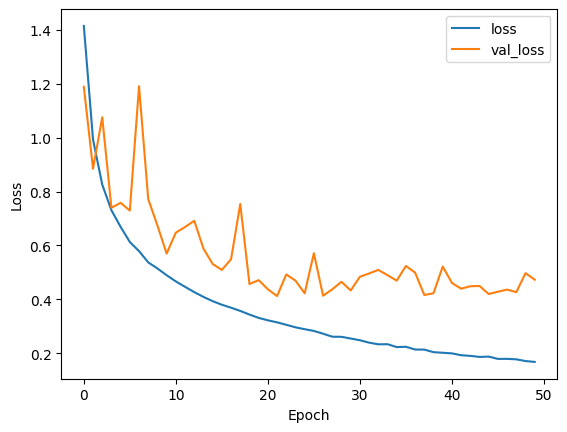

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

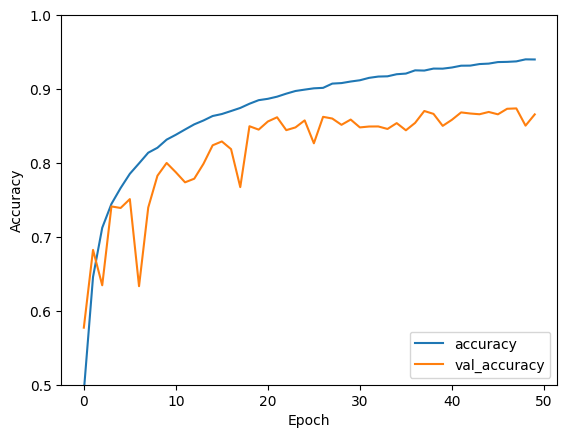

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [40]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']